In [1]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import OneHotEncoder
# import time
import warnings
warnings.filterwarnings('ignore')

# enc = OneHotEncoder()
path = 'data/'
train = pd.read_csv(path+'train.csv')
vali = pd.read_csv(path+'validation.csv')
test = pd.read_csv(path+'test.csv')
# start_time = time.time()

In [2]:
basectr = train['click'].value_counts(normalize = True)[1]
basectr

0.0007539649884458758

In [3]:
ad_ctr = []
ad_name = [1458,3476,3427,3358,2259,2821,3386,2997,2261]
for i in ad_name:
    ad_ctr.append(train['click'][train['advertiser']==i].value_counts(normalize = True)[1])
ad_len = len(ad_name)
ad_ctr

[0.00083473226564105031,
 0.00050464562342478474,
 0.00074884754565216914,
 0.00076448084204447765,
 0.00030658545558598702,
 0.00062225602378400803,
 0.0007180766777520589,
 0.0046066034099877034,
 0.00030675100937663219]

In [7]:
train_onehot = pd.read_csv('train_onehot_new.csv')
vali_onehot = pd.read_csv('vali_onehot_new.csv')

In [8]:
vali_ad_onehot = []
for i in ad_name:
    vali_ad_onehot.append(vali_onehot[vali_onehot["advertiser_"+str(i)]==1]) 

In [9]:
def dataprocessing (data,data_onehot):
    slotprice = data['slotprice']
    bidprice = data['bidprice']
    payprice = data['payprice']
    click = data['click']
    
    ad_onehot = []
    
    ad_onehot = []
    for i in ad_name:
        ad_onehot.append(data_onehot[data_onehot["advertiser_"+str(i)]==1]) 
    
    ad_click = []
    for i in ad_name:
        ad_click.append(data['click'][data['advertiser']==i])
        
    return ad_onehot, ad_click, slotprice, bidprice, payprice

In [10]:
train_ad_onehot,train_ad_click,train_slotprice,train_bidprice,train_payprice = dataprocessing(train,train_onehot)
vali_ad_onehot,vali_ad_click,vali_slotprice,vali_bidprice,vali_payprice = dataprocessing(vali,vali_onehot)

In [11]:
len(train_ad_onehot)

9

In [12]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import classification_report as report

In [13]:
train_click = train[['click','advertiser']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_onehot, train_click, test_size=0.2, random_state=42)

In [14]:
def dataprocessing_ (data_onehot,click):
    ad_onehot = []
    for i in ad_name:
        ad_onehot.append(data_onehot[data_onehot["advertiser_"+str(i)]==1]) 
#     print('done')
    ad_click = []
    for i in ad_name:
#         print(type(click))
        a = click[click['advertiser']==i]
        a = a.drop('advertiser',1)
#         print(a.head())
        ad_click.append(a)    
    return ad_onehot, ad_click

In [15]:
_train_ad_onehot,_train_ad_click = dataprocessing_(X_train,y_train)
_ad_onehot,_ad_click= dataprocessing_(X_test,y_test)

In [18]:
from sklearn.linear_model import LogisticRegression

lr_model = []
train_ad_lrpd = []
train_ad_lrrmse = []
train_ad_lrauc = []
vali_ad_lrpd = []
vali_ad_lrrmse = []
vali_ad_lrauc = []

for i in range(ad_len):
    lr_model.append(LogisticRegression(class_weight = 'balanced'))
    lr_model[i].fit(train_ad_onehot[i], train_ad_click[i])
    train_ad_lrpd.append((lr_model[i].predict_proba(train_ad_onehot[i]))[:,1])
    train_ad_lrrmse.append(rmse(train_ad_click[i],train_ad_lrpd[i]))
    train_ad_lrauc.append(auc(train_ad_click[i],train_ad_lrpd[i]))
    vali_ad_lrpd.append((lr_model[i].predict_proba(vali_ad_onehot[i]))[:,1])
    vali_ad_lrrmse.append(rmse(vali_ad_click[i],vali_ad_lrpd[i]))
    vali_ad_lrauc.append(auc(vali_ad_click[i],vali_ad_lrpd[i]))
    print(i+1,'/9')
    

1 /9
2 /9
3 /9
4 /9
5 /9
6 /9
7 /9
8 /9
9 /9


In [19]:
j = 0
print('Logistic Regression trainning results')
for i in ad_name:
    
    print('ad',i,':','RMSE',train_ad_lrrmse[j],'AUC',train_ad_lrauc[j])
    
    j+=1
j = 0
print('Logistic Regression validation results')
for i in ad_name:    
    print('ad',i,':','RMSE',vali_ad_lrrmse[j],'AUC',vali_ad_lrauc[j])
    j+=1

Logistic Regression trainning results
ad 1458 : RMSE 0.236819782905 AUC 0.97648797561
ad 3476 : RMSE 0.346331860944 AUC 0.925409770998
ad 3427 : RMSE 0.291740787612 AUC 0.955986216714
ad 3358 : RMSE 0.262456111409 AUC 0.975187421654
ad 2259 : RMSE 0.331020110766 AUC 0.936973808058
ad 2821 : RMSE 0.428184838864 AUC 0.837203190399
ad 3386 : RMSE 0.433885054059 AUC 0.790749067328
ad 2997 : RMSE 0.472800670955 AUC 0.70374755128
ad 2261 : RMSE 0.276484253808 AUC 0.96354773941
Logistic Regression validation results
ad 1458 : RMSE 0.238458902921 AUC 0.950522384327
ad 3476 : RMSE 0.34878288525 AUC 0.664427881396
ad 3427 : RMSE 0.29089782566 AUC 0.927794333192
ad 3358 : RMSE 0.264020068045 AUC 0.900181977046
ad 2259 : RMSE 0.329035040681 AUC 0.659387327689
ad 2821 : RMSE 0.429888551212 AUC 0.618796601733
ad 3386 : RMSE 0.433616953471 AUC 0.67040050451
ad 2997 : RMSE 0.477098067958 AUC 0.667465814811
ad 2261 : RMSE 0.276340334871 AUC 0.52785634119


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = []
train_ad_rfpd = []
train_ad_rfrmse = []
train_ad_rfauc = []
vali_ad_rfpd = []
vali_ad_rfrmse = []
vali_ad_rfauc = []

for i in range(ad_len):
    rf_model.append(RandomForestClassifier(n_estimators=50, max_depth=15, random_state=2017))
    rf_model[i].fit(train_ad_onehot[i], train_ad_click[i])
    train_ad_rfpd.append((rf_model[i].predict_proba(train_ad_onehot[i]))[:,1])
    train_ad_rfrmse.append(rmse(train_ad_click[i],train_ad_rfpd[i]))
    train_ad_rfauc.append(auc(train_ad_click[i],train_ad_rfpd[i]))
    vali_ad_rfpd.append((rf_model[i].predict_proba(vali_ad_onehot[i]))[:,1])
    vali_ad_rfrmse.append(rmse(vali_ad_click[i],vali_ad_rfpd[i]))
    vali_ad_rfauc.append(auc(vali_ad_click[i],vali_ad_rfpd[i]))
    print(i+1,'/9')
    

1 /9
2 /9
3 /9
4 /9
5 /9
6 /9
7 /9
8 /9
9 /9


In [21]:
j = 0
print('random forest trainning results')
for i in ad_name:
    
    print('ad',i,':','RMSE',train_ad_rfrmse[j],'AUC',train_ad_rfauc[j])
    
    j+=1
j = 0
print('random forest validation results')
for i in ad_name:    
    print('ad',i,':','RMSE',vali_ad_rfrmse[j],'AUC',vali_ad_rfauc[j])
    j+=1

random forest trainning results
ad 1458 : RMSE 0.0206354988129 AUC 0.999407509158
ad 3476 : RMSE 0.0184468591658 AUC 0.999726397554
ad 3427 : RMSE 0.0224076299965 AUC 0.999052584637
ad 3358 : RMSE 0.021810827074 AUC 0.997375102623
ad 2259 : RMSE 0.0145293845256 AUC 0.999201421781
ad 2821 : RMSE 0.0215474213039 AUC 0.996983995637
ad 3386 : RMSE 0.0239921667852 AUC 0.996682757647
ad 2997 : RMSE 0.0654183671527 AUC 0.940485972623
ad 2261 : RMSE 0.0135280100227 AUC 0.999778775641
random forest validation results
ad 1458 : RMSE 0.0244789946604 AUC 0.915764902043
ad 3476 : RMSE 0.0180653417045 AUC 0.804952272268
ad 3427 : RMSE 0.0283000335803 AUC 0.94059983577
ad 3358 : RMSE 0.0263264345625 AUC 0.88220763778
ad 2259 : RMSE 0.0259315535327 AUC 0.614622578786
ad 2821 : RMSE 0.0250807669506 AUC 0.558995110478
ad 3386 : RMSE 0.0245902394732 AUC 0.724251378422
ad 2997 : RMSE 0.0658352288264 AUC 0.655449784902
ad 2261 : RMSE 0.0194210495672 AUC 0.680336700337


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = []
train_ad_gbcpd = []
train_ad_gbcrmse = []
train_ad_gbcauc = []
vali_ad_gbcpd = []
vali_ad_gbcrmse = []
vali_ad_gbcauc = []
    
for i in range(ad_len):

    gbc_model.append(GradientBoostingClassifier(n_estimators= 100,max_depth= 4, min_samples_leaf=15, learning_rate= 0.035))
#     print('fitting model:',i)
    gbc_model[i].fit(train_ad_onehot[i], train_ad_click[i])
#     print('predicting')
    train_ad_gbcpd.append((gbc_model[i].predict_proba(train_ad_onehot[i]))[:,1])
    train_ad_gbcrmse.append(rmse(train_ad_click[i],train_ad_gbcpd[i]))
    train_ad_gbcauc.append(auc(train_ad_click[i],train_ad_gbcpd[i]))
    vali_ad_gbcpd.append((gbc_model[i].predict_proba(vali_ad_onehot[i]))[:,1])
    vali_ad_gbcrmse.append(rmse(vali_ad_click[i],vali_ad_gbcpd[i]))
    vali_ad_gbcauc.append(auc(vali_ad_click[i],vali_ad_gbcpd[i]))
    print(i+1,'/9')

1 /9
2 /9
3 /9
4 /9
5 /9
6 /9
7 /9
8 /9
9 /9


In [24]:
j = 0
print('gradient boosting classification trainning results')
for i in ad_name:
    print('ad',i,':','RMSE',train_ad_gbcrmse[j],'AUC',train_ad_gbcauc[j])
    j+=1
j = 0
print('gradient boosting classification validation results')
for i in ad_name:    
    print('ad',i,':','RMSE',vali_ad_gbcrmse[j],'AUC',vali_ad_gbcauc[j])
    j+=1

gradient boosting classification trainning results
ad 1458 : RMSE 0.026443750082 AUC 0.724700871457
ad 3476 : RMSE 0.022830452512 AUC 0.811639244735
ad 3427 : RMSE 0.0260609938648 AUC 0.67768014107
ad 3358 : RMSE 0.0251371761448 AUC 0.936727371031
ad 2259 : RMSE 0.0166765141688 AUC 0.896786301953
ad 2821 : RMSE 0.0238972925263 AUC 0.872763741275
ad 3386 : RMSE 0.0263632548102 AUC 0.808190100721
ad 2997 : RMSE 0.067300809438 AUC 0.789301125757
ad 2261 : RMSE 0.0176942765021 AUC 0.911662446145
gradient boosting classification validation results
ad 1458 : RMSE 0.0269461885943 AUC 0.703915131305
ad 3476 : RMSE 0.0207309003167 AUC 0.674057629899
ad 3427 : RMSE 0.0282553662663 AUC 0.674674189447
ad 3358 : RMSE 0.0237282904513 AUC 0.920677388202
ad 2259 : RMSE 0.0259758503478 AUC 0.580102278268
ad 2821 : RMSE 0.0251567783722 AUC 0.592125039038
ad 3386 : RMSE 0.0245737886826 AUC 0.739048297085
ad 2997 : RMSE 0.0654336574265 AUC 0.69494200041
ad 2261 : RMSE 0.021365131573 AUC 0.572248410026


In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
pipe_model = []

for i in range(ad_len):
    pipe_model.append(Pipeline([('feature_selection', SelectFromModel(gbc_model[i])),('classification',lr_model[i])]))
    pipe_model[i].fit(train_ad_onehot[i],train_ad_click[i])

In [26]:
pipe_pd = []
pipe_rmse = []
pipe_auc = []
for i in range(ad_len):
    pipe_pd.append((pipe_model[i].predict_proba(vali_ad_onehot[i]))[:,1])
    pipe_rmse.append(rmse(vali_ad_click[i],pipe_pd[i]))
    pipe_auc.append(auc(vali_ad_click[i],pipe_pd[i]))

In [27]:
j = 0
print('gbc+lr validation results')
for i in ad_name:    
    print('ad',i,':','RMSE',pipe_rmse[j],'AUC',pipe_auc[j])
    j+=1

gbc+lr validation results
ad 1458 : RMSE 0.25884552927 AUC 0.962506377657
ad 3476 : RMSE 0.386376332685 AUC 0.804582773637
ad 3427 : RMSE 0.306552422176 AUC 0.910795896023
ad 3358 : RMSE 0.292740254655 AUC 0.896430753464
ad 2259 : RMSE 0.416138631791 AUC 0.51788484553
ad 2821 : RMSE 0.453868605753 AUC 0.5837623458
ad 3386 : RMSE 0.443040636138 AUC 0.74942360904
ad 2997 : RMSE 0.478011017826 AUC 0.65935483458
ad 2261 : RMSE 0.447906787911 AUC 0.622005237561


In [28]:
# ## Concatenating Level 1 results
train_L1 = []
test_L1 = []
L2_model = []
vali_pd = []
for i in range(ad_len):
    print(i)
    train_L1.append(np.column_stack((train_ad_gbcpd[i],train_ad_rfpd[i])))
    test_L1.append(np.column_stack((vali_ad_gbcpd[i],vali_ad_rfpd[i])))#add as much as u want and wish u good luck
    

    # ## Fitting Level 1 models

    L2_model.append(LogisticRegression(class_weight = 'balanced'))#y_pred_rfbagging,y_pred_xgb

    L2_model[i].fit(train_L1[i],train_ad_click[i])
    vali_pd.append(L2_model[i].predict(test_L1[i]))

0
1
2
3
4
5
6
7
8


In [29]:
st_vali_pd = []
for i in range(ad_len):
    st_vali_pd.append((L2_model[i].predict_proba(test_L1[i]))[:,1])

In [47]:
for i in range(ad_len):
    print(rmse(vali_ad_click[i],st_vali_pd[i]),'&',auc(vali_ad_click[i],st_vali_pd[i]))

& 0.907353063777
& 0.804403472693
& 0.892737470862
& 0.839850345231
& 0.609591773414
& 0.559722195112
& 0.724303565356
& 0.662594105296
& 0.677396184063


In [51]:
j = 0
for i in range(ad_len):
    print(ad_name[j],'&',"%.4f" %vali_ad_lrrmse[j],'&',"%.4f" %vali_ad_gbcrmse[j],'&',"%.4f" %pipe_rmse[j],'&',"%.4f" %vali_ad_rfrmse[j],'&',"%.4f" %rmse(vali_ad_click[j],st_vali_pd[j]))
    j+=1

1458 & 0.2385 & 0.0269 & 0.2588 & 0.0245 & 0.0805
3476 & 0.3488 & 0.0207 & 0.3864 & 0.0181 & 0.0692
3427 & 0.2909 & 0.0283 & 0.3066 & 0.0283 & 0.0914
3358 & 0.2640 & 0.0237 & 0.2927 & 0.0263 & 0.1363
2259 & 0.3290 & 0.0260 & 0.4161 & 0.0259 & 0.1516
2821 & 0.4299 & 0.0252 & 0.4539 & 0.0251 & 0.1654
3386 & 0.4336 & 0.0246 & 0.4430 & 0.0246 & 0.1526
2997 & 0.4771 & 0.0654 & 0.4780 & 0.0658 & 0.3648
2261 & 0.2763 & 0.0214 & 0.4479 & 0.0194 & 0.0931


In [32]:
model_name = ['logistic regresssion','gradient boosting classifier','GBC + LR','Random Forest','RF/GBC + LG']

In [33]:
def ad_to_total (ad_onehot,ad_pd):
    ad_pctr = ad_onehot
    j = 0
    for i in ad_name:
        ad_pctr[j]['pctr'] = ad_pd[j]
        ad_pctr[j]['ad'] = i
        ad_pctr[j] = ad_pctr[j][['pctr','ad']]
        j+=1
    pctr = (pd.concat(ad_pctr)).sort_index()
    return pctr

In [39]:
models = [vali_ad_lrpd,vali_ad_gbcpd,pipe_pd,vali_ad_rfpd,vali_pd]

In [41]:
models_pctr = [0]* 5
for i in range(len(models_pctr)):
    models_pctr[i] = ad_to_total(vali_ad_onehot, models[i])

In [59]:
print('Logistic Regression','&',rmse(vali['click'],models_pctr[0]['pctr']),'&',auc(vali['click'],models_pctr[0]['pctr']),'\\\\')

Logistic Regression & 0.337029349387 & 0.825844479153 \\


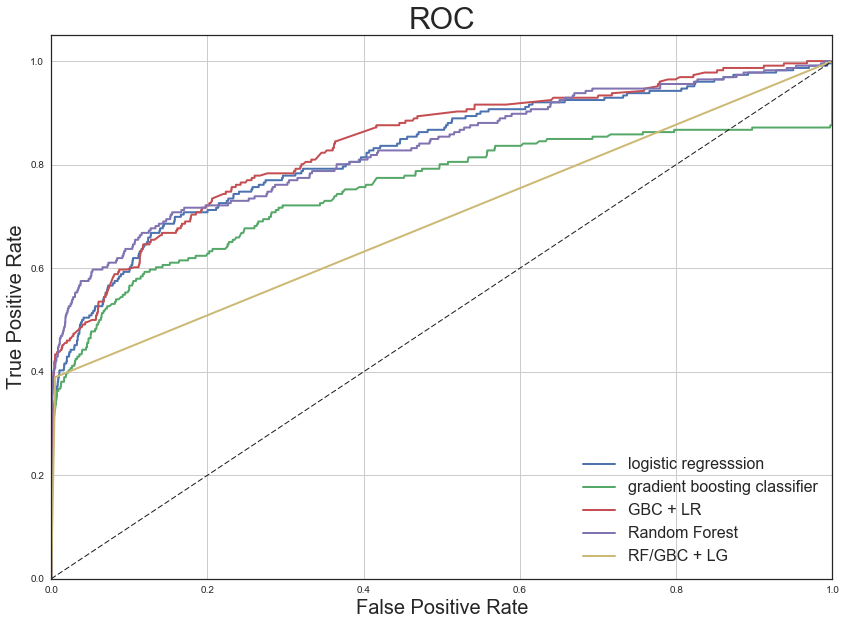

In [46]:
import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns
from sklearn import metrics
sns.set(style="white", color_codes=True)
from sklearn.metrics import roc_curve
plt.figure(figsize=(14,10))


for i in range(5):
    fpr, tpr, thresholds = roc_curve(vali['click'], models_pctr[i]['pctr'])
    lab = 'AUC=%.5f' % metrics.auc(fpr, tpr)
    # axes.step(fpr, tpr, lw=2,label=lab)
    plt.plot(fpr, tpr,label=model_name[i],linewidth=2)

# axes.legend(loc='lower right', fontsize='small')
plt.xlabel('False Positive Rate',fontsize=20)  
plt.ylabel('True Positive Rate',fontsize=20) 
plt.title('ROC',fontsize=30) 
plt.grid(True)
plt.legend(loc="lower right",prop={'size':16})
plt.plot([0, 1], [0, 1], 'k--', lw=1) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])

plt.show()